In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

In [5]:
data = pd.read_csv("churn prediction.csv")
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [6]:
data = pd.read_csv("churn prediction.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.shape

(7043, 21)

In [8]:
data.shape

(7043, 21)

In [9]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


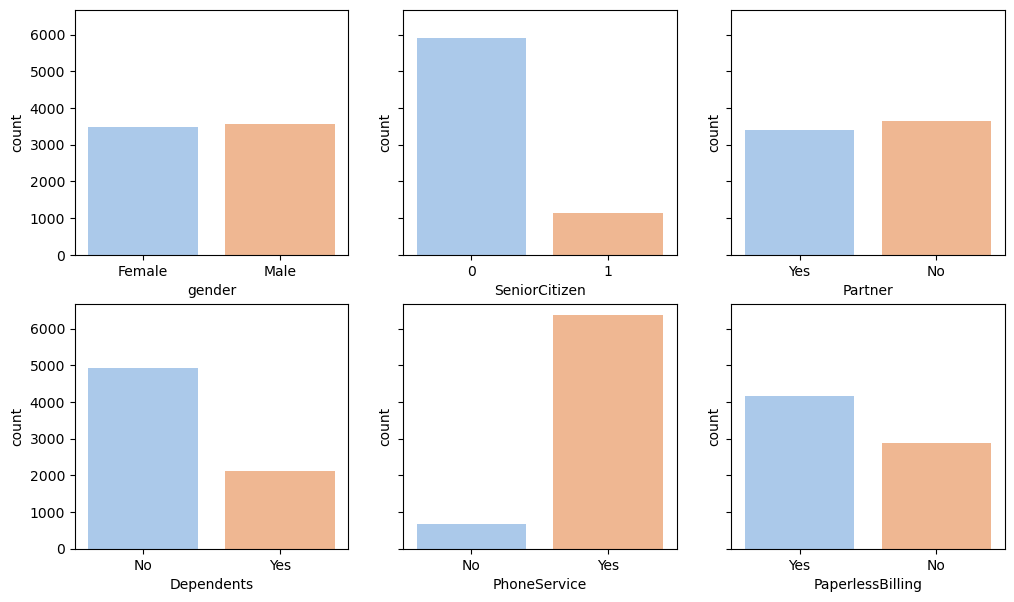

In [16]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x="gender", data=data, ax=axes[0,0])
    sns.countplot(x="SeniorCitizen", data=data, ax=axes[0,1])
    sns.countplot(x="Partner", data=data, ax=axes[0,2])
    sns.countplot(x="Dependents", data=data, ax=axes[1,0])
    sns.countplot(x="PhoneService", data=data, ax=axes[1,1])
    sns.countplot(x="PaperlessBilling", data=data, ax=axes[1,2])

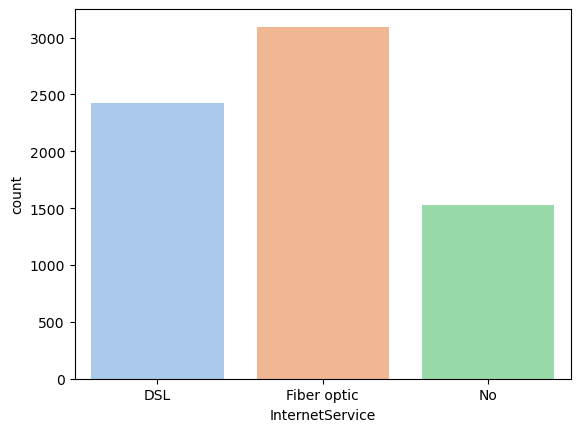

In [20]:
with sns.color_palette("pastel"):
    sns.countplot(x="InternetService", data=data)

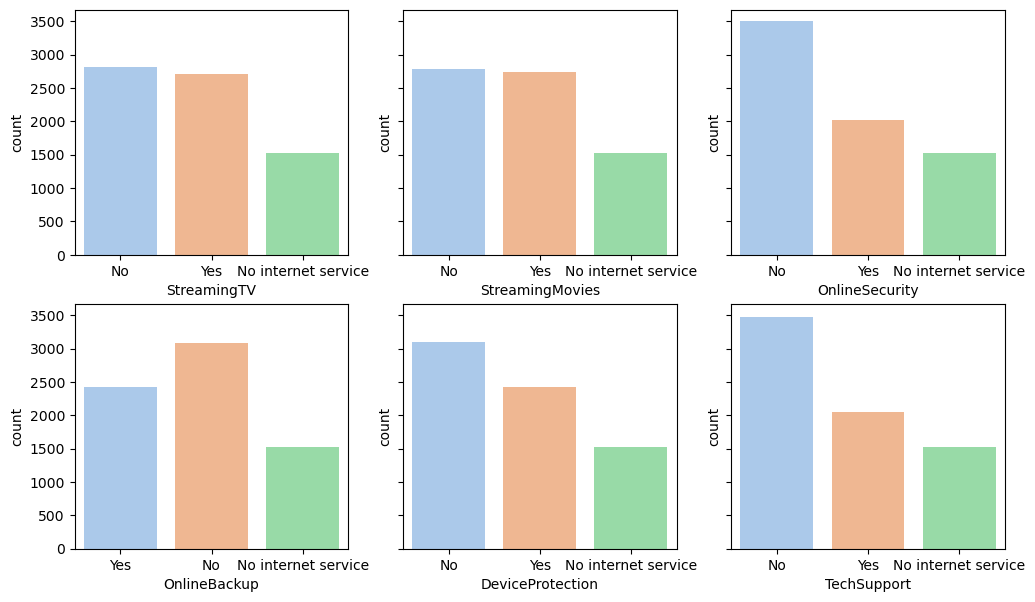

In [21]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x="StreamingTV", data=data, ax=axes[0,0])
    sns.countplot(x="StreamingMovies", data=data, ax=axes[0,1])
    sns.countplot(x="OnlineSecurity", data=data, ax=axes[0,2])
    sns.countplot(x="OnlineBackup", data=data, ax=axes[1,0])
    sns.countplot(x="DeviceProtection", data=data, ax=axes[1,1])
    sns.countplot(x="TechSupport", data=data, ax=axes[1,2])

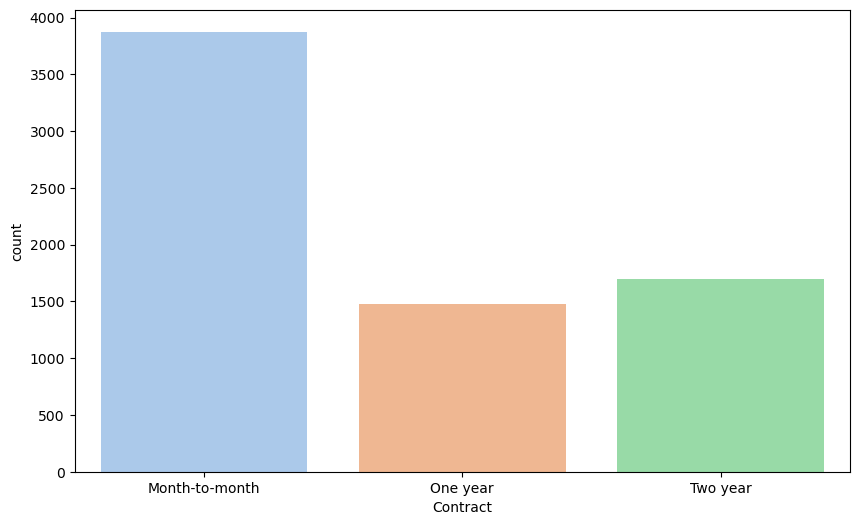

In [26]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="Contract", data=data)

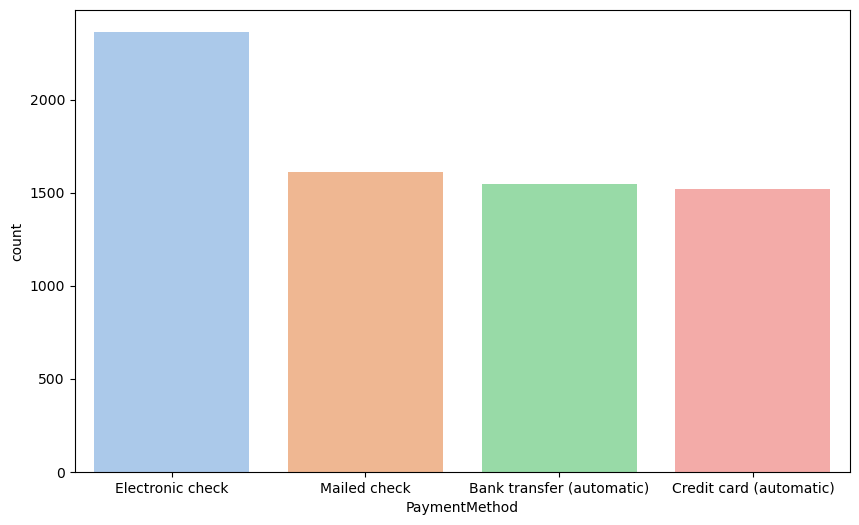

In [27]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="PaymentMethod", data=data)

C:\Users\nihar\AppData\Local\Temp\ipykernel_21280\4275856236.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tenure"], ax=axes[0])
C:\Users\nihar\AppData\Local\Temp\ipykernel_21280\4275856236.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MonthlyCharges"], ax=axes[1])


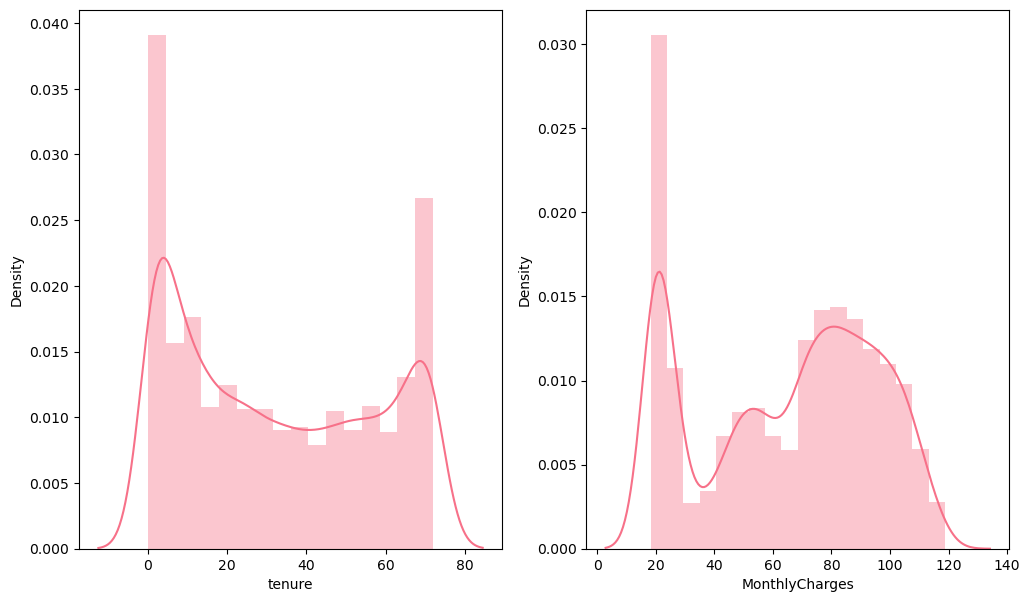

In [28]:
with sns.color_palette("husl"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))
    sns.distplot(data["tenure"], ax=axes[0])
    sns.distplot(data["MonthlyCharges"], ax=axes[1])

In [29]:
churnnum = {'Yes':1, 'No':0}
data.Churn.replace(churnnum, inplace=True)
churnnum

{'Yes': 1, 'No': 0}

In [12]:
genderval = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval

C:\Users\nihar\AppData\Local\Temp\ipykernel_15592\876405688.py:1: FutureWarning: The operation <function mean at 0x0000016471BF36D0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  genderval = pd.pivot_table(data, values='Churn', index=['gender'],


SeniorCitizen
gender
Female
Male


In [31]:
data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [35]:
import pandas as pd
X = pd.read_csv("churn prediction.csv")
nox = X[X.Churn == 0]
noy = X[X.Churn == 1]
yesupsampled = noy.sample(n=len(nox), replace=True, random_state=42)
print(len(yesupsampled))

0
